In [1]:
import os

import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import skimage.io
import skimage.transform
from tqdm import tqdm
from PIL import Image

In [2]:
idx = 3

synsin_tgt_im_f = f'/private/home/ronghanghu/workspace/synsin/results_realestate10K_ours/realestate10k_nodepth_perceptual_l1laplacian_inpaintGonly_scale2_long/100000/{idx:04d}/tgt_image_.png'
ours_tgt_im_f = f'/private/home/ronghanghu/workspace/synsin/results_realestate10K_ours/realestate10k_nodepth_perceptual_l1laplacian_inpaintGonly_scale2_long/100000_save_tgt_old/{idx:04d}/tgt_image_.png'
orig_im_f = f'/checkpoint/ronghanghu/neural_rendering_datasets/realestate10K/RealEstate10K/all_frames/test/000db54a47bd43fe/231197633.png'

In [3]:
synsin_tgt_im = skimage.io.imread(synsin_tgt_im_f)
ours_tgt_im = skimage.io.imread(ours_tgt_im_f)

skimage_tgt_im = skimage.img_as_ubyte(
    skimage.transform.resize(skimage.io.imread(orig_im_f), [256, 256]).astype(np.float32))
pil_tgt_im = np.array(Image.open(orig_im_f).resize([256, 256], Image.BILINEAR))

In [4]:
def plot_diff(im1, im2):
    assert im1.dtype == im2.dtype
    dtype = im1.dtype
#     diff = np.abs(im1.astype(np.int32) - im2.astype(np.int32)).astype(dtype)
    diff = np.max(np.abs(im1.astype(np.int32) - im2.astype(np.int32)).astype(dtype), axis=-1)
    plt.imshow(diff)

Text(0.5, 1.0, 'pixel diff')

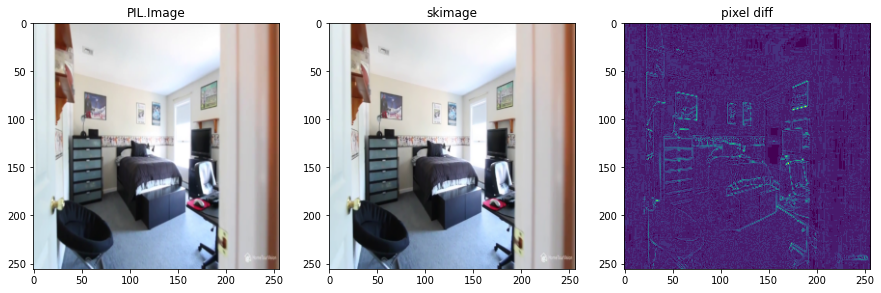

In [5]:
assert np.all(skimage_tgt_im == ours_tgt_im)
assert np.all(pil_tgt_im == synsin_tgt_im)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(synsin_tgt_im)
plt.title('PIL.Image')
plt.subplot(1, 3, 2)
plt.imshow(ours_tgt_im)
plt.title('skimage')
plt.subplot(1, 3, 3)
plot_diff(synsin_tgt_im, ours_tgt_im)
plt.title('pixel diff')
# plt.colorbar()